In [1]:
pip install qiskit

In [2]:
!which python
!python --version

/usr/local/bin/python
Python 3.10.12


In [3]:
!pip show qiskit

Name: qiskit
Version: 0.38.0
Summary: Software for developing quantum computing programs
Home-page: https://github.com/Qiskit/qiskit
Author: Qiskit Development Team
Author-email: hello@qiskit.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: qiskit-aer, qiskit-ibmq-provider, qiskit-terra
Required-by: 


In [4]:
!sudo apt install python3.10-venv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.10-venv is already the newest version (3.10.12-1~22.04.3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [5]:
!python -m venv venv

In [6]:
!source venv/bin/activate

In [7]:
!pip install qiskit

In [8]:
import qiskit

In [9]:
!pip install qiskit

In [10]:
!pip install qiskit-ibmq-provider

In [11]:
!pip uninstall qiskit
!pip install qiskit==0.38.0

Found existing installation: qiskit 0.38.0
Uninstalling qiskit-0.38.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/qiskit-0.38.0.dist-info/*
Proceed (Y/n)? Y
  Successfully uninstalled qiskit-0.38.0
  Using cached qiskit-0.38.0-py3-none-any.whl


In [12]:
import qiskit

In [13]:
from qiskit import IBMQ

In [14]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.21.2', 'qiskit-aer': '0.11.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.38.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [15]:
IBMQ.save_account('aecbba7a467ecfc2fb942be8751eafcb310616da7c4479d34916580c4820467fc06342dfc64ec135b98851640865732e3ecb05ab478d58e10f9991ef0a7b0480')

configrc.store_credentials:WARNING:2024-03-15 09:24:12,823: Credentials already present. Set overwrite=True to overwrite.


In [16]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [17]:
from qiskit import *

In [18]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

In [19]:
circuit = QuantumCircuit(qr, cr)

In [20]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

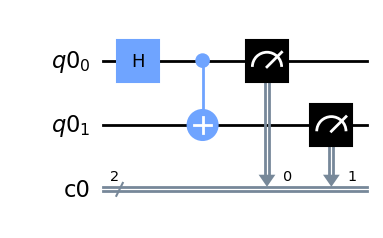

In [24]:
circuit.draw(output='mpl')

In [21]:
circuit.h(0)
circuit.cx(0,1) # order is control, target
circuit.measure([0,1], [0,1]) # qubits [0,1] are measured and results are stored in classical bits [0,1] in order

In [22]:
!pip install pylatexenc

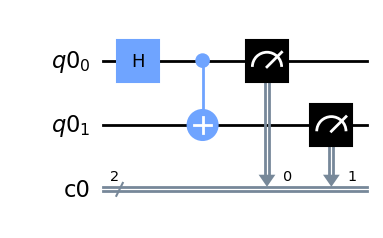

In [23]:
circuit.draw(output='mpl')

# RUNNING IN SIMULATOR

In [25]:
simulator = Aer.get_backend('qasm_simulator')

In [26]:
result = execute(circuit, backend=simulator).result()

In [27]:
from qiskit.visualization import plot_histogram

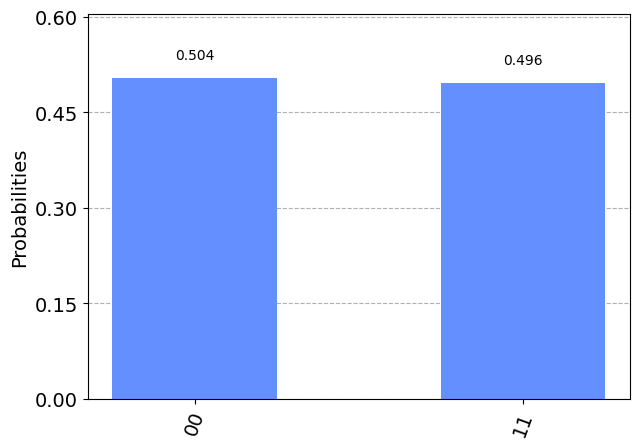

In [28]:
plot_histogram(result.get_counts(circuit))

# RUNNING IN REAL QUANTUM HARDWARE

In [29]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')

ibmqfactory.load_account:WARNING:2024-03-15 09:29:31,891: Credentials are already in use. The existing account in the session will be replaced.


In [32]:
num_qubits = 2

from qiskit.providers.ibmq import least_busy
possible_devices = provider.backends(filters=lambda x:
                                     x.configuration().n_qubits >= num_qubits
                                       and
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)

ibm_kyoto


In [33]:
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [34]:
job = execute(circuit, backend=qcomp)

In [35]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


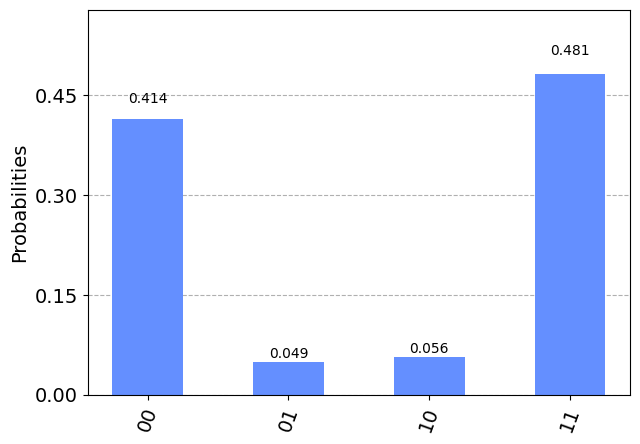

In [36]:
result = job.result()
plot_histogram(result.get_counts(circuit))


In [37]:
%qiskit_disable_job_watcher

# Understand quantum circuits

<bound method Result.get_statevector of Result(backend_name='qasm_simulator', backend_version='0.11.0', qobj_id='47d0e34d-d3c0-4902-9d15-a2ca4a30392f', job_id='591b88b5-1eac-4e3d-aa31-88f1d5a8d213', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 1024}), header=QobjExperimentHeader(clbit_labels=[['c', 0]], creg_sizes=[['c', 1]], global_phase=0.0, memory_slots=1, metadata={}, n_qubits=1, name='circuit-302', qreg_sizes=[['q', 1]], qubit_labels=[['q', 0]]), status=DONE, seed_simulator=4042543836, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0], 'num_clbits': 1, 'parallel_state_update': 2, 'sample_measure_time': 0.000277613, 'num_qubits': 1, 'device': 'CPU', 'input_qubit_map': [[0, 0]], 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.001259789)], date=2024-03-15T10:16:17.310997, stat

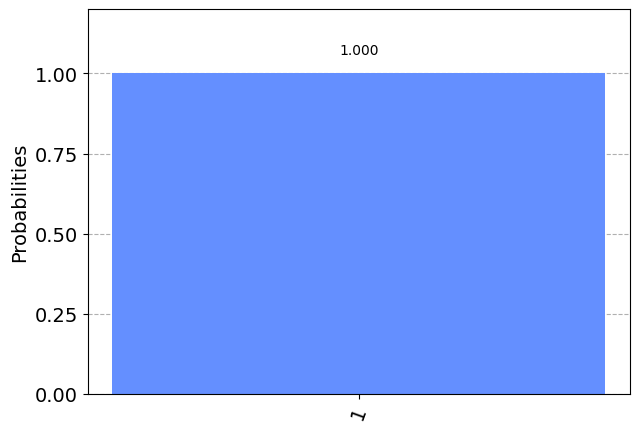

In [63]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.measure([0], [0])
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
statevector = result.get_statevector
print(statevector)
counts = result.get_counts()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

<bound method Result.get_statevector of Result(backend_name='qasm_simulator', backend_version='0.11.0', qobj_id='e2e86dc4-2d71-42ca-aefe-e0ae353814e0', job_id='0b4dfeaf-1850-4929-9dd5-73e20f1a682f', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 1024}), header=QobjExperimentHeader(clbit_labels=[['c', 0]], creg_sizes=[['c', 1]], global_phase=0.0, memory_slots=1, metadata={}, n_qubits=1, name='circuit-313', qreg_sizes=[['q', 1]], qubit_labels=[['q', 0]]), status=DONE, seed_simulator=1876385439, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0], 'num_clbits': 1, 'parallel_state_update': 2, 'sample_measure_time': 0.00029441, 'num_qubits': 1, 'device': 'CPU', 'input_qubit_map': [[0, 0]], 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.001271209)], date=2024-03-15T10:16:19.437831, statu

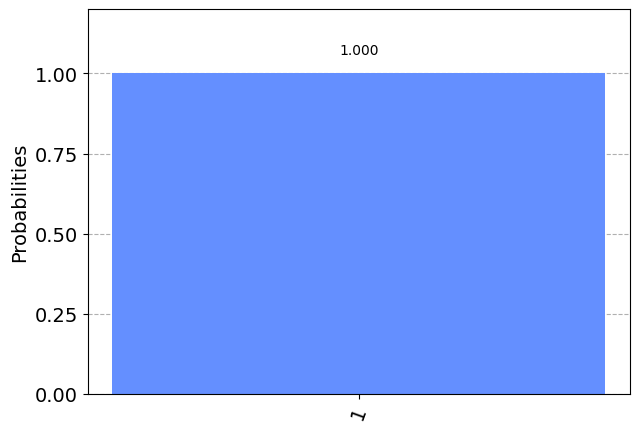

In [64]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.measure([0], [0])
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
statevector = result.get_statevector
print(statevector)
counts = result.get_counts()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

ERROR:  [Experiment 0] Circuit circuit-324 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method.


<bound method Result.get_unitary of Result(backend_name='unitary_simulator', backend_version='0.11.0', qobj_id='2cbdbe36-582d-49b8-8564-cbadfbe6cbe3', job_id='45d1626e-2dae-492a-87be-5498af1648cc', success=False, results=[ExperimentResult(shots=0, success=False, meas_level=2, data=ExperimentResultData(), status=ERROR: Circuit circuit-324 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method., seed_simulator=0, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'num_qubits': 2, 'device': 'CPU', 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'statevector'}, time_taken=0.0)], date=2024-03-15T10:16:23.112813, status=ERROR:  [Experiment 0] Circuit circuit-324 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method., header=QobjHeader(backend_name='unitary_simulator', backend_version='0.11.0'), metadata={'time_tak

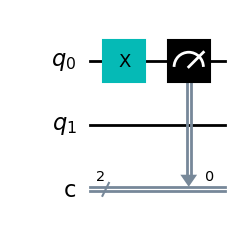

In [65]:
circuit = QuantumCircuit(2,2)
circuit.x(0)
circuit.measure([0], [0])
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
unitary = result.get_unitary
print(unitary)
%matplotlib inline
circuit.draw(output='mpl')

<bound method Result.get_statevector of Result(backend_name='qasm_simulator', backend_version='0.11.0', qobj_id='75917b96-41f6-40d6-b289-270c613153a6', job_id='5accac3e-c0ef-46f1-8848-b9ef2b5a6c43', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1024}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-201', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=2126656667, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0], 'num_clbits': 2, 'parallel_state_update': 2, 'sample_measure_time': 0.000295334, 'num_qubits': 1, 'device': 'CPU', 'input_qubit_map': [[0, 0]], 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.001277791)], date=2024-03-15T1

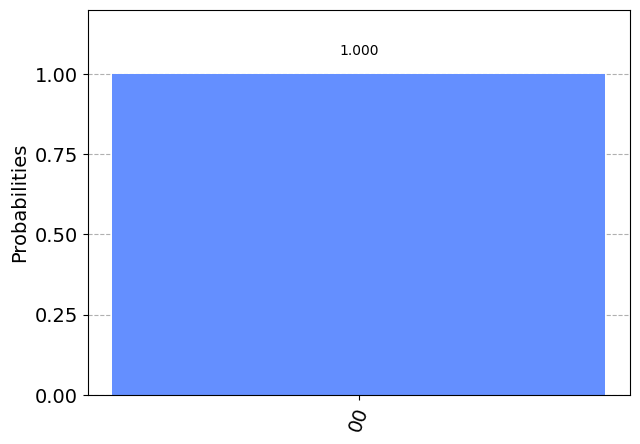

In [52]:
circuit = QuantumCircuit(2,2)
circuit.x(1)
circuit.measure([0], [0])
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
statevector = result.get_statevector
print(statevector)
counts = result.get_counts()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# Quatum Teleporation

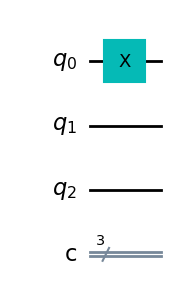

In [66]:
circuit = QuantumCircuit(3,3)
circuit.x(0) # qubit 0 is now in state |1>, and this is the state that we want to teleport
circuit.draw(output='mpl')

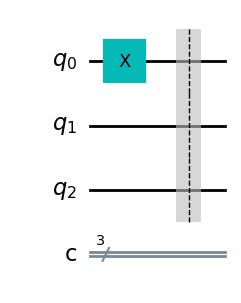

In [67]:
circuit.barrier() # just a visual aid
circuit.draw(output='mpl')

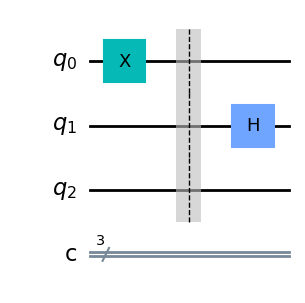

In [68]:
circuit.h(1)
circuit.draw(output='mpl')

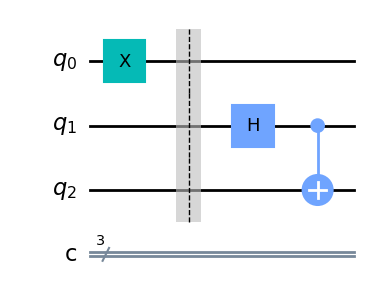

In [69]:
circuit.cx(1,2)
circuit.draw(output='mpl')

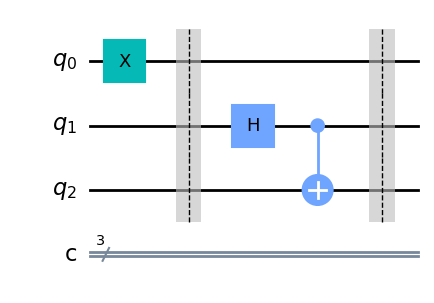

In [70]:
circuit.barrier() # just a visual aid
circuit.draw(output='mpl')

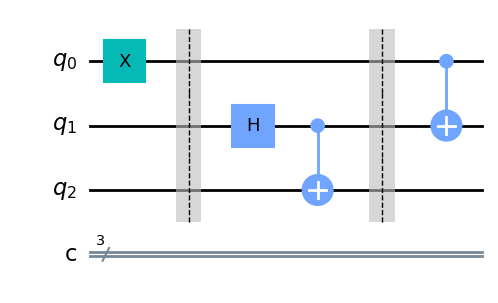

In [71]:
circuit.cx(0,1)
circuit.draw(output='mpl')

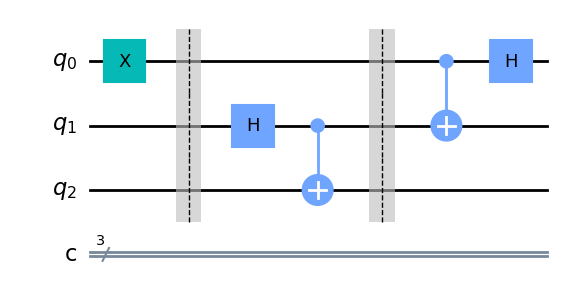

In [72]:
circuit.h(0)
circuit.draw(output='mpl')

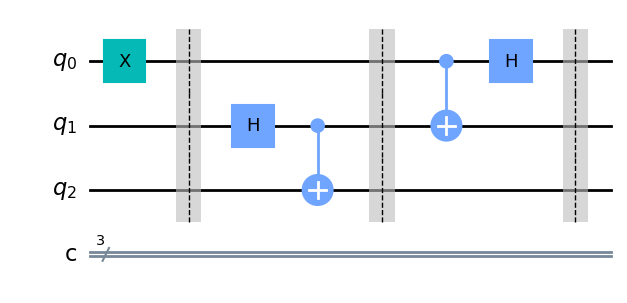

In [73]:
circuit.barrier() # just a visual aid
circuit.draw(output='mpl')

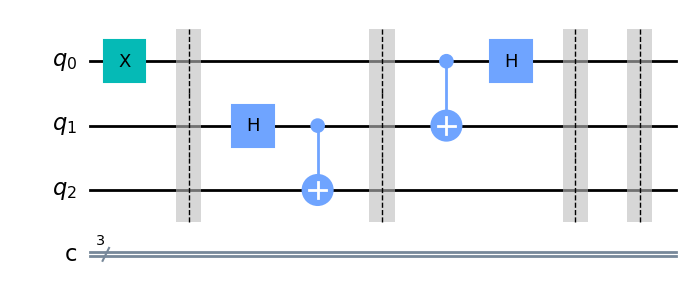

In [74]:
circuit.barrier() # just a visual aid
circuit.draw(output='mpl')

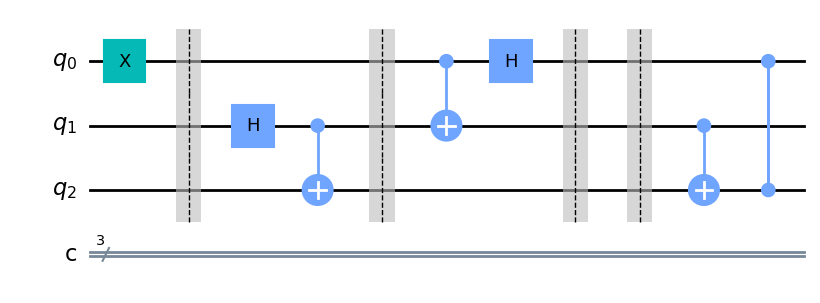

In [75]:
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.draw(output='mpl')

In [76]:
circuit.measure([2], [2])

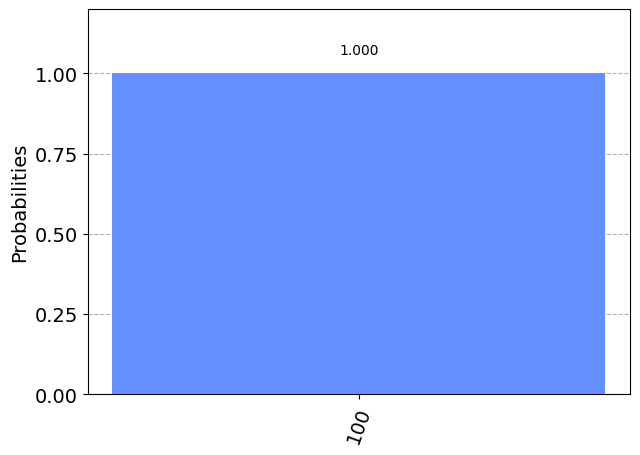

In [77]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

# Bernstein-Vazirani algorithm

In [79]:
s = '110101'

In [80]:
n = len(s)

circuit = QuantumCircuit(n+1,n)

In [81]:
# Step 0

circuit.x(n) # the n+1 qubits are indexed 0...n, so the last qubit is index n

circuit.barrier() # just a visual aid for now

# Step 1

circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits

circuit.barrier() # just a visual aid for now

# Step 2

for ii, yesno in enumerate(reversed(s)):
    if yesno == '1':
        circuit.cx(ii, n)

circuit.barrier() # just a visual aid for now

# Step 3

circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits

circuit.barrier() # just a visual aid for now

circuit.measure(range(n), range(n)) # measure the qubits indexed from 0 to n-1 and store them into the classical bits indexed 0 to n-1

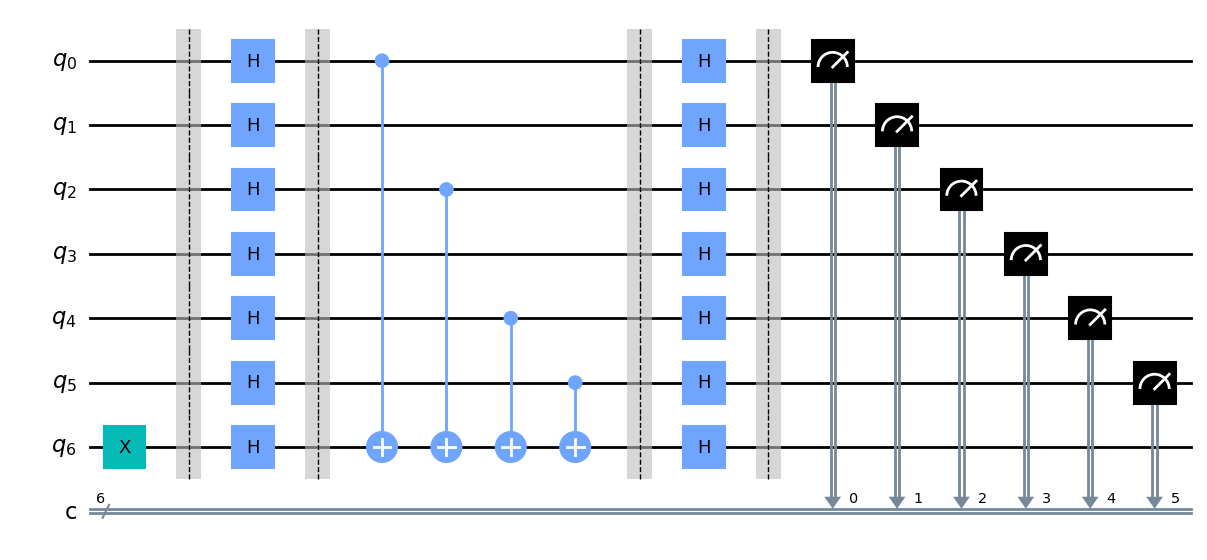

In [82]:
%matplotlib inline
circuit.draw(output='mpl')

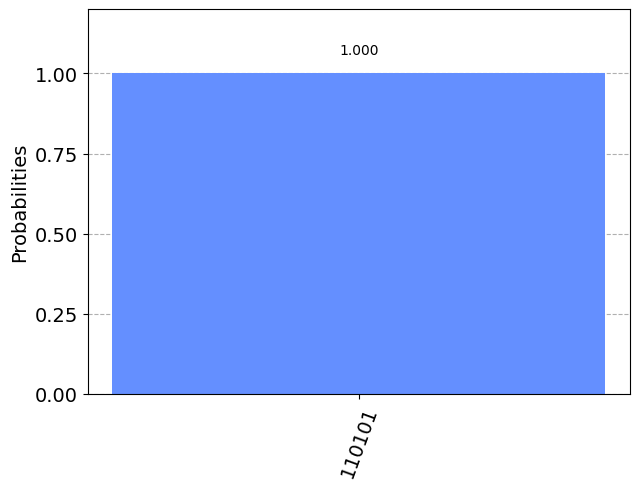

In [84]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))